# Big Data / Open Data Roadmap
Possiamo trovare numerose fonti con Open Data utilizzabili con python per produrre una elaborazione che calcoli degli indici o evidenzi delle relazioni tra i dati.

Una volta evidenziate delle relazioni interessanti o degli indici è possibile valutare l'aggiunta di algoritmi per la previsione dei valori. 

La previsione avviene valutando i dati presenti, suddividendoli in set di training e di test e addestrando un modello. 
Esistono vari modelli:
- regressione lineare: per prevedere dati che sono in una relazione lineare
- regressione logistica: prevede la probabilità che un fatti avvenga oppure no
- xxx
- alberi di decisione
- random forest
- reti neurali

### Cosa va realizzato? Che forma ha il processo?
Uno o più script che sono eseguiti per leggere i dati, pulirli e renderli omogenei prima della loro analisi.

Abbiamo due alternative:
- Il processo può prendere più fonti dati sullo stesso tema e cercare di unirle, uniformarle, su una tabella (o struttura) comune. Es. combino dati ARPA di diverse regioni o nazioni che hanno formati leggermente diversi e a cui magari mancano delle informazioni.
- Il processo preleva più fonti dati dierse tra loro e le carica in più "tabelle" indipendenti. L'elaborazione o l'analisi mette in evidenza delle relazioni tra le diverse fonti. Es. carico dati di inquinamento ed evidenzio la localizzazione per città, poi cerco di sovrapporli con i dati ISTAT della popolazione per città. Li posso collegare a una mappa con dati o servizi che forniscono le coordinate di una citta a partire dal nome...


# 1. i Dati
Sono il punto di partenza e si possono prelevare in vari formati da vari siti (al limite kaggle per degli esempi). I formati possono essere per esempio:
- csv
- xls
- json
- parquet
- xml
- txt
- pdf
- html
- webservices che rispondono in txt, json o xml


### Caricare i dati in CVS
Carico di dati da CSV e ricavo info utili sui dati contenuti con info(), describe() e head()


In [2]:
import pandas as pd
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

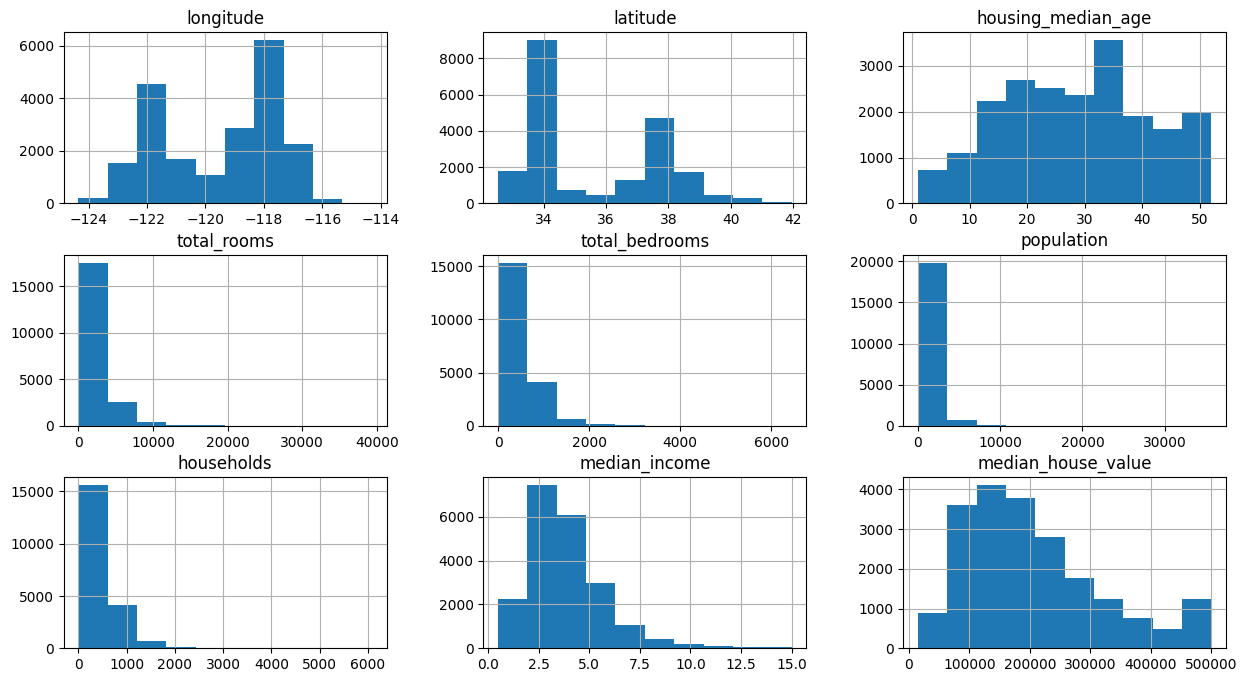

In [5]:
df.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

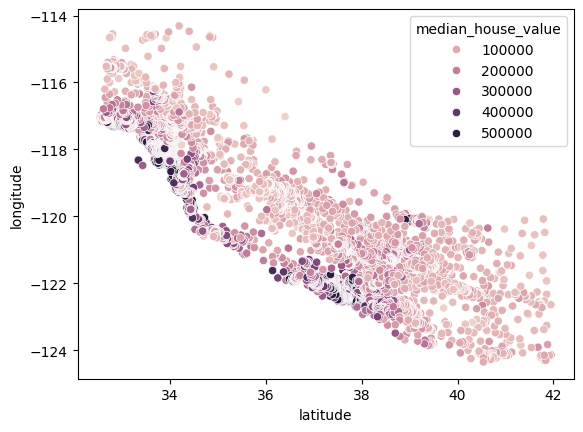

In [6]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value")
#, s=df["population"]/100)

<Axes: xlabel='latitude', ylabel='longitude'>

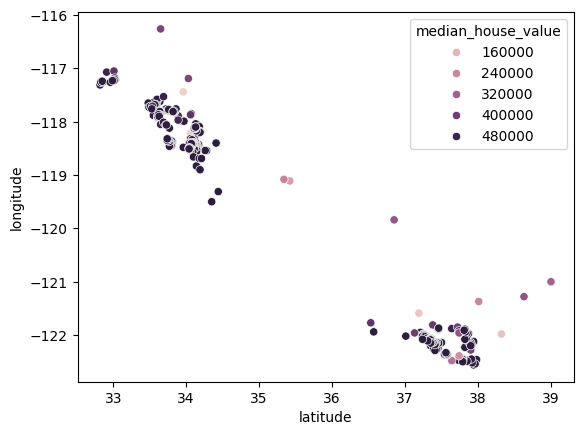

In [7]:
sb.scatterplot(x="latitude", y="longitude", data=df[(df.median_income>10)], hue="median_house_value")


**Campi vuoti o nulli**

In [8]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


**Dummies / One-Hot Encoding**
Uno dei campi presenta delle "etichette" e non è adatto alle elaborazioni. Il campo va convertito in tante colonne quante sono le etichette. 

In [9]:
df2["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [10]:
dummies = pd.get_dummies(df2["ocean_proximity"], dtype=int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [11]:
#unisco le colonne dummies al dataframe
df3 = df2.join(dummies)


In [12]:
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [13]:
df4 = df3.drop(["ocean_proximity"], axis=1)
df4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


**Convertire il tipo di un campo**
Es. ho una colonna con numeri in formato testuale...

**Rinomino colonne**

#### Dati da SQL

#### Dati da MongoDB

#### Dati da Excel

### Evidenzio le relazioni tra i dati
il metodo corr() fornisce una mappa di valutazione delle correlazioni tra i valori.
I valori positivi e vicini a 1.00 indicano correlazione forte (direttamente proporzionale). Se la correlazione è 0, significa che non ci sono dei legami. Se il valore è negativo (al max -1.0) il legame è di proporzionalità inversa.

In [14]:
df4.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


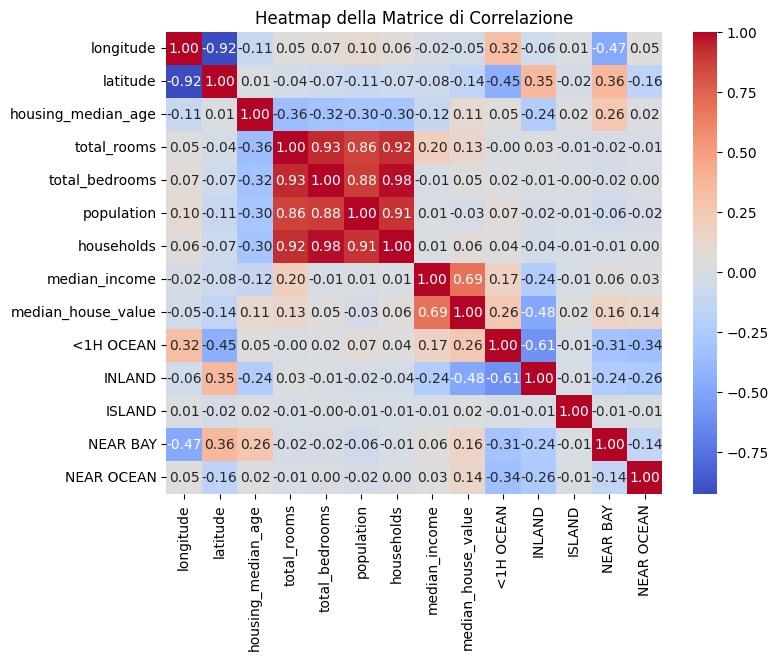

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sb.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap della Matrice di Correlazione")
plt.show()

A me interessa maggiormente il comportamento e le relazioni del valore delle case per capire da cosa sono influenzate

In [21]:
df4.corr()["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64